<a href="https://colab.research.google.com/github/Kambey-san/ASIM/blob/HW_lesson_08/KAA_ASIM_HW_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Прикладная статистика в медицине
## Урок 8. Подведение итогов и консультация по проекту/ ДЗ
К уроку приложен реальный датасет по когорте пациентов с одним из наиболее агрессивных раков — с раком поджелудочной железы.

-Препроцессируйте уже анонимизированные данные, интегрируйте разделы датасета с помощью функций семейства _ join.

-Сделайте описательные статистики датасета, не забудьте посмотреть, что за тип переменных содержится в колонках.

-Попробуйте проверить несколько гипотез с помощью статистических тестов (на качественных переменных) и сделайте анализ выживаемости.

-В каких группах (по каким переменным) выживаемость отличается?

Задание выполняется на языке R и предоставляется в Google Colab или PDF/html рендере Quarto.

<a href='https://gbcdn.mrgcdn.ru/uploads/asset/6052009/attachment/618c83041e6116fb98cbd0d60d61add0.zip'>proj_data.zip</a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
install.packages("tidyverse")
install.packages("readxl")
install.packages("writexl")
install.packages("ggplot2")
install.packages("gplots")
install.packages("skimr")
install.packages("psych")
install.packages("gridExtra")
install.packages("moments")
install.packages("fitdistrplus")
install.packages("data.table")
install.packages("car")
install.packages("rstatix")
install.packages("emmeans")
install.packages("ez")
install.packages("MASS")
install.packages("tidyr")
install.packages("simpleboot")
install.packages("coin")
install.packages("boot")
install.packages("jackknifeR")
install.packages("lubridate")
install.packages("survival")
install.packages("ggsurvfit")
install.packages("gtsummaryt")
install.packages("tidycmprsk")
install.packages("condSURV")
install.packages("survminer")
install.packages("readr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mnormt’, ‘GPArotation’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site

In [2]:
remotes::install_github("zabore/condsurv")

rlang      (1.1.3 -> 1.1.4) [CRAN]
cli        (3.6.2 -> 3.6.3) [CRAN]
munsell    (0.5.0 -> 0.5.1) [CRAN]
farver     (2.1.1 -> 2.1.2) [CRAN]
isoband    (0.2.6 -> 0.2.7) [CRAN]
gtable     (0.3.4 -> 0.3.5) [CRAN]
tidyselect (1.2.0 -> 1.2.1) [CRAN]


Installing 7 packages: rlang, cli, munsell, farver, isoband, gtable, tidyselect

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpZjCHG7/remotes2893ac663d4/zabore-condsurv-e618590/DESCRIPTION’ ... OK
* preparing ‘condsurv’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘condsurv_1.0.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
library(tidyverse)
library(readxl)
library(writexl)
library(ggplot2)
library(gplots)
library(skimr)
library(psych)
library(gridExtra)
library(moments)
library(fitdistrplus)
library(data.table)
library(car)
library(rstatix)
library(emmeans)
library(ez)
library(MASS)
library(tidyr)
library(simpleboot)
library(coin)
library(boot)
library(jackknifeR)
library(lubridate)
library(survival)
library(ggsurvfit)
library(gtsummary)
library(tidycmprsk)
library(condSURV)
library(survminer)
library(readr)


Attaching package: ‘gtsummary’


The following object is masked from ‘package:MASS’:

    select



Attaching package: ‘tidycmprsk’


The following object is masked from ‘package:gtsummary’:

    trial


Loading required package: ggpubr


Attaching package: ‘survminer’


The following object is masked from ‘package:survival’:

    myeloma




In [26]:
clinical <- read_tsv('/content/drive/MyDrive/Data_since_in_Healthcare/ASIM/HW_08/clinical.tsv')
exposure <- read_tsv('/content/drive/MyDrive/Data_since_in_Healthcare/ASIM/HW_08/exposure.tsv')
family_history <- read_tsv('/content/drive/MyDrive/Data_since_in_Healthcare/ASIM/HW_08/family_history.tsv')
follow_up <- read_tsv('/content/drive/MyDrive/Data_since_in_Healthcare/ASIM/HW_08/follow_up.tsv')
pathology_detail <- read_tsv('/content/drive/MyDrive/Data_since_in_Healthcare/ASIM/HW_08/pathology_detail.tsv')

New names:
• `residual_disease` -> `residual_disease...118`
• `residual_disease` -> `residual_disease...189`
Rows: 1745 Columns: 210
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (210): case_id, case_submitter_id, project_id, age_at_index, age_is_obfuscated, cause_of_death, cause_of_death_source, country_of_birth, country_of_residence_at_enrollment, days_to_birth, days...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 401 Columns: 44
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (44): case_id, case_submitter_id, project_id, age_at

In [27]:
data <- full_join(clinical, pathology_detail, by = c("case_id", "project_id"))
data

Warning message in full_join(clinical, pathology_detail, by = c("case_id", "project_id")):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 202 of `x` matches multiple rows in `y`.
ℹ Row 1 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship = "many-to-many"` to silence this warning.”


case_id,case_submitter_id.x,project_id,age_at_index,age_is_obfuscated,cause_of_death,cause_of_death_source,country_of_birth,country_of_residence_at_enrollment,days_to_birth,⋯,tumor_infiltrating_macrophages,tumor_largest_dimension_diameter.y,tumor_length_measurement,tumor_level_prostate,tumor_shape,tumor_thickness,tumor_width_measurement,vascular_invasion_present.y,vascular_invasion_type.y,zone_of_origin_prostate
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
00061f34-c891-4f9c-b8d6-3ca68b98c875,AD1348,FM-AD,'--,'--,'--,'--,'--,'--,'--,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
0035b612-8955-4da5-a35d-bced5b32cbec,AD258,FM-AD,'--,'--,'--,'--,'--,'--,'--,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
008147fd-3235-4bab-b816-7589590959d1,AD10836,FM-AD,'--,'--,'--,'--,'--,'--,'--,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
00f67c2e-b77f-4082-907c-1dd4ea418f14,AD12672,FM-AD,'--,'--,'--,'--,'--,'--,'--,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
01462f16-c767-40ee-8c81-d3927d308aa8,AD8272,FM-AD,'--,'--,'--,'--,'--,'--,'--,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
014cd6ee-733c-4894-997e-cfb534a587c1,AD15735,FM-AD,'--,'--,'--,'--,'--,'--,'--,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
01775b06-5836-469c-8537-120cb8cc94e9,TCGA-IB-7897,TCGA-PAAD,53,'--,'--,'--,'--,'--,-19718,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
01775b06-5836-469c-8537-120cb8cc94e9,TCGA-IB-7897,TCGA-PAAD,53,'--,'--,'--,'--,'--,-19718,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
01793010-6599-4c35-91ae-534d03577343,AD7106,FM-AD,'--,'--,'--,'--,'--,'--,'--,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [49]:
write_xlsx(data, '/content/drive/MyDrive/Data_since_in_Healthcare/ASIM/HW_08/data.xlsx')

In [28]:
names(data)

[1] "case_id"                                  "case_submitter_id.x"                      "project_id"                               "age_at_index"                            
  [5] "age_is_obfuscated"                        "cause_of_death"                           "cause_of_death_source"                    "country_of_birth"                        
  [9] "country_of_residence_at_enrollment"       "days_to_birth"                            "days_to_death"                            "education_level"                         
 [13] "ethnicity"                                "gender"                                   "marital_status"                           "occupation_duration_years"               
 [17] "premature_at_birth"                       "race"                                     "vital_status"                             "weeks_gestation_at_birth"                
 [21] "year_of_birth"                            "year_of_death"                            "adrenal_hormone"                          "age_at_diagnosis"                        
 [25] "ajcc_clinical_m"                          "ajcc_clinical_n"                          "ajcc_clinical_stage"                      "ajcc_clinical_t"                         
 [29] "ajcc_pathologic_m"                        "ajcc_pathologic_n"                        "ajcc_pathologic_stage"                    "ajcc_pathologic_t"                       
 [33] "ajcc_staging_system_edition"              "ann_arbor_b_symptoms"                     "ann_arbor_b_symptoms_described"           "ann_arbor_clinical_stage"                
 [37] "ann_arbor_extranodal_involvement"         "ann_arbor_pathologic_stage"               "best_overall_response"                    "burkitt_lymphoma_clinical_variant"       
 [41] "cancer_detection_method"                  "child_pugh_classification"                "clark_level"                              "classification_of_tumor"                 
 [45] "cog_liver_stage"                          "cog_neuroblastoma_risk_group"             "cog_renal_stage"                          "cog_rhabdomyosarcoma_risk_group"         
 [49] "contiguous_organ_invaded"                 "days_to_best_overall_response"            "days_to_diagnosis"                        "days_to_last_follow_up"                  
 [53] "days_to_last_known_disease_status"        "days_to_recurrence"                       "diagnosis_is_primary_disease"             "double_expressor_lymphoma"               
 [57] "double_hit_lymphoma"                      "eln_risk_classification"                  "enneking_msts_grade"                      "enneking_msts_metastasis"                
 [61] "enneking_msts_stage"                      "enneking_msts_tumor_site"                 "ensat_clinical_m"                         "ensat_pathologic_n"                      
 [65] "ensat_pathologic_stage"                   "ensat_pathologic_t"                       "esophageal_columnar_dysplasia_degree"     "esophageal_columnar_metaplasia_present"  
 [69] "fab_morphology_code"                      "figo_stage"                               "figo_staging_edition_year"                "first_symptom_longest_duration"          
 [73] "first_symptom_prior_to_diagnosis"         "gastric_esophageal_junction_involvement"  "gleason_grade_group"                      "gleason_grade_tertiary"                  
 [77] "gleason_patterns_percent"                 "gleason_score"                            "goblet_cells_columnar_mucosa_present"     "icd_10_code"                             
 [81] "igcccg_stage"                             "inpc_grade"                               "inpc_histologic_group"                    "inrg_stage"                              
 [85] "inss_stage"                               "international_prognostic_index"           "irs_group"                                "irs_stage"                               
 [89] "ishak_fibrosis_score"                     "iss_stage"                          

In [29]:
summary(data)

   case_id          case_submitter_id.x  project_id        age_at_index       age_is_obfuscated  cause_of_death     cause_of_death_source country_of_birth   country_of_residence_at_enrollment
 Length:1787        Length:1787         Length:1787        Length:1787        Length:1787        Length:1787        Length:1787           Length:1787        Length:1787                       
 Class :character   Class :character    Class :character   Class :character   Class :character   Class :character   Class :character      Class :character   Class :character                  
 Mode  :character   Mode  :character    Mode  :character   Mode  :character   Mode  :character   Mode  :character   Mode  :character      Mode  :character   Mode  :character                  
 days_to_birth      days_to_death      education_level     ethnicity            gender          marital_status     occupation_duration_years premature_at_birth     race           vital_status      
 Length:1787        Length:1787   

In [30]:
# Выведем статистику с помощью skimr
library(skimr)
num_desc_stats <- skimr::skim(data, where(is.numeric))

In [31]:
options(width = 200)
print(num_desc_stats)

── Data Summary ────────────────────────
                           Values
Name                       data  
Number of rows             1787  
Number of columns          285   
_______________________          
Column type frequency:           
  character                285   
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
    skim_variable                            n_missing complete_rate min max empty n_unique whitespace
  1 case_id                                          0         1      36  36     0     1205          0
  2 case_submitter_id.x                              0         1       1  17     0     1205          0
  3 project_id                                       0         1       5  25     0        6          0
  4 age_at_index                       

In [32]:
num_fact_stats <- skimr::skim(data, where(is.factor))
options(width = 200)
print(num_fact_stats)

── Data Summary ────────────────────────
                           Values
Name                       data  
Number of rows             1787  
Number of columns          285   
_______________________          
Column type frequency:           
  character                285   
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
    skim_variable                            n_missing complete_rate min max empty n_unique whitespace
  1 case_id                                          0         1      36  36     0     1205          0
  2 case_submitter_id.x                              0         1       1  17     0     1205          0
  3 project_id                                       0         1       5  25     0        6          0
  4 age_at_index                       

In [33]:
# Сохраним в файлы
write_xlsx(num_desc_stats, '/content/drive/MyDrive/Data_since_in_Healthcare/ASIM/HW_08/desc_stats_numeric.xlsx')
write_xlsx(num_fact_stats, '/content/drive/MyDrive/Data_since_in_Healthcare/ASIM/HW_08/desc_stats_factor.xlsx')

In [35]:
# Выведем описательную статистику по всем Numeric столбцам с помощью psych::describe и сохраним в файл
desc_stats <- data %>%
  dplyr::select(where(is.numeric)) %>%
  map_df(~ psych::describe(.))

rownames(desc_stats) <- colnames(data)[sapply(data, where(is.numeric))]

print(desc_stats)
write_xlsx(desc_stats, '/content/drive/MyDrive/Data_since_in_Healthcare/ASIM/HW_08/desc_stats_psych.xlsx')

Warning message:
“Setting row names on a tibble is deprecated.”


# A tibble: 0 × 0


In [36]:
# Функция для создания гистограмм для каждого столбца из таблицы data
create_histogram <- function(data, binwidth = 1) {
  numeric_columns <- dplyr::select(data, where(is.numeric))
  histograms <- list()  # Создаем пустой список для хранения гистограмм
  for (column in colnames(numeric_columns)) {
    # Фильтрация строк без пропущенных значений
    filtered_data <- data[complete.cases(data[column]), ]

    # Создаем гистограмму и сохраняем ее в списке
    histograms[[column]] <- ggplot(filtered_data, aes(x = !!sym(column))) +
      geom_histogram(binwidth = binwidth, fill = "skyblue", color = "black", bins = 30) +
      # geom_vline(aes(xintercept = median(filtered_data[[column]]), color = "Median"), linetype = "dashed", linewidth = 1) +
      # geom_vline(aes(xintercept = mean(filtered_data[[column]]), color = "Mean"), linetype = "dashed", linewidth = 1) +
      # geom_vline(aes(xintercept = mode(filtered_data[[column]]), color = "Mode"), linetype = "dashed", linewidth = 1) +
      geom_density(color = "red") +
      labs(title = paste("Гистограмма дисперсии значений", column),
           x = column,
           y = "Частота")
      theme_minimal(base_size = 24) +  # Increase base font size
      theme(plot.title = element_text(size = 27))  # Increase title font size
  }
  return(histograms)  # Возвращаем список гистограмм
}

In [37]:
# Построение гистограмм
histograms <- create_histogram(data, binwidth = 0.01)

print(histograms)

list()


In [38]:
# Функция для создания гистограмм и определения распределения
create_histogram <- function(data, binwidth = 1) {
  numeric_columns <- dplyr::select(data, where(is.numeric))
  histograms <- list()  # Создаем пустой список для хранения гистограмм
  for (column in colnames(numeric_columns)) {
    # Фильтрация строк без пропущенных значений
    filtered_data <- data[complete.cases(data[column]), ]

    # Создаем гистограмму
    hist <- ggplot(filtered_data, aes(x = !!sym(column))) +
      geom_histogram(binwidth = binwidth, fill = "skyblue", color = "black") +
      geom_density(color = "red") +
      labs(title = paste("Гистограмма дисперсии значений", column),
           x = column,
           y = "Частота") +
      theme_minimal(base_size = 14) +  # Increase base font size
      theme(plot.title = element_text(size = 18))  # Increase title font size

    # Определяем тип распределения
    dist <- identify_distribution_by_histogram(filtered_data[[column]])
    dist_text <- paste("Распределение:", dist)

    # Добавляем текст с типом распределения к гистограмме
    hist <- hist + annotate("text", x = Inf, y = Inf, label = dist_text, vjust = 1, hjust = 1)

    # Сохраняем гистограмму в списке
    histograms[[column]] <- hist
  }
  return(histograms)  # Возвращаем список гистограмм
}

identify_distribution_by_histogram <- function(column) {
  # Количество бинов для гистограммы
  n_bins <- 30
  hist_data <- hist(column, breaks = n_bins, plot = FALSE)
  # Подсчет частот в бинах
  frequencies <- hist_data$counts
  # Проверка на одинаковую частоту во всех бинах (равномерное распределение)
  if (all(diff(frequencies) == 0)) {
    return("Равномерное")
  }
  # Проверка на симметричность
  skewness <- moments::skewness(column)
  if (abs(skewness) < 0.5) {  # Выбираем пороговое значение 0.5 для определения симметричности
    return("Симметричное")
  }
  # Проверка на нормальное распределение
  shapiro_test <- shapiro.test(column)
  if (shapiro_test$p.value > 0.05) {
    return("Нормальное")
  }
  # Проверка на экспоненциальное распределение
  exp_params <- suppressWarnings(MASS::fitdistr(column, "exponential"))
  if (!is.null(exp_params$estimate) && all(exp_params$estimate > 0)) {
    return("Экспоненциальное")
  }
  # Проверка на логнормальное распределение
  if (shapiro_test$p.value <= 0.05) {
    return("Лог-нормальное")
  }
  # По умолчанию возвращаем неизвестный тип распределения
  return("Неизвестно")
}

In [39]:
histograms <- create_histogram(data, binwidth = 0.01)
print(histograms)

list()


In [57]:
install.packages("lsr")
install.packages("effsize")
install.packages("GGally")
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘ggstats’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [58]:
library(lsr)
library(effsize)
library(GGally)
library(corrplot)


Attaching package: ‘effsize’


The following object is masked from ‘package:psych’:

    cohen.d


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘GGally’


The following object is masked from ‘package:emmeans’:

    pigs


corrplot 0.92 loaded



In [59]:
factor_cols <- c("age_at_diagnosis")

In [60]:
# Напишем функцию, которая переведет колонки в Factor и Numeric

convert_columns <- function(data, columns) {
  data <- mutate(data, across(all_of(columns), as.factor),
                        across(!all_of(columns), as.numeric))
  return(data)
}

In [61]:
# Применим функцию к нашей объединённой таблице
data <- convert_columns(data, factor_cols)
data

case_id,case_submitter_id.x,project_id,age_at_index,age_is_obfuscated,cause_of_death,cause_of_death_source,country_of_birth,country_of_residence_at_enrollment,days_to_birth,⋯,tumor_infiltrating_macrophages,tumor_largest_dimension_diameter.y,tumor_length_measurement,tumor_level_prostate,tumor_shape,tumor_thickness,tumor_width_measurement,vascular_invasion_present.y,vascular_invasion_type.y,zone_of_origin_prostate
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,53,NA,NA,NA,NA,NA,-19718,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,53,NA,NA,NA,NA,NA,-19718,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [87]:
pair_cols <- c('age_at_diagnosis', 'days_to_treatment_start', 'days_to_treatment_end', 'days_to_death')

Warning message:
“Removed 1572 rows containing non-finite outside the scale range (`stat_boxplot()`).”
Warning message:
“Removed 1666 rows containing non-finite outside the scale range (`stat_boxplot()`).”
Warning message:
“Removed 1222 rows containing non-finite outside the scale range (`stat_boxplot()`).”
Warning message:
“Removed 1572 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 1572 rows containing non-finite outside the scale range (`stat_density()`).”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 1671 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 1672 rows containing missing values”
Warning message:
“Removed 1666 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 1671 rows containing missing values or values outside the scale range (`geom_point()`).”
Warning messa

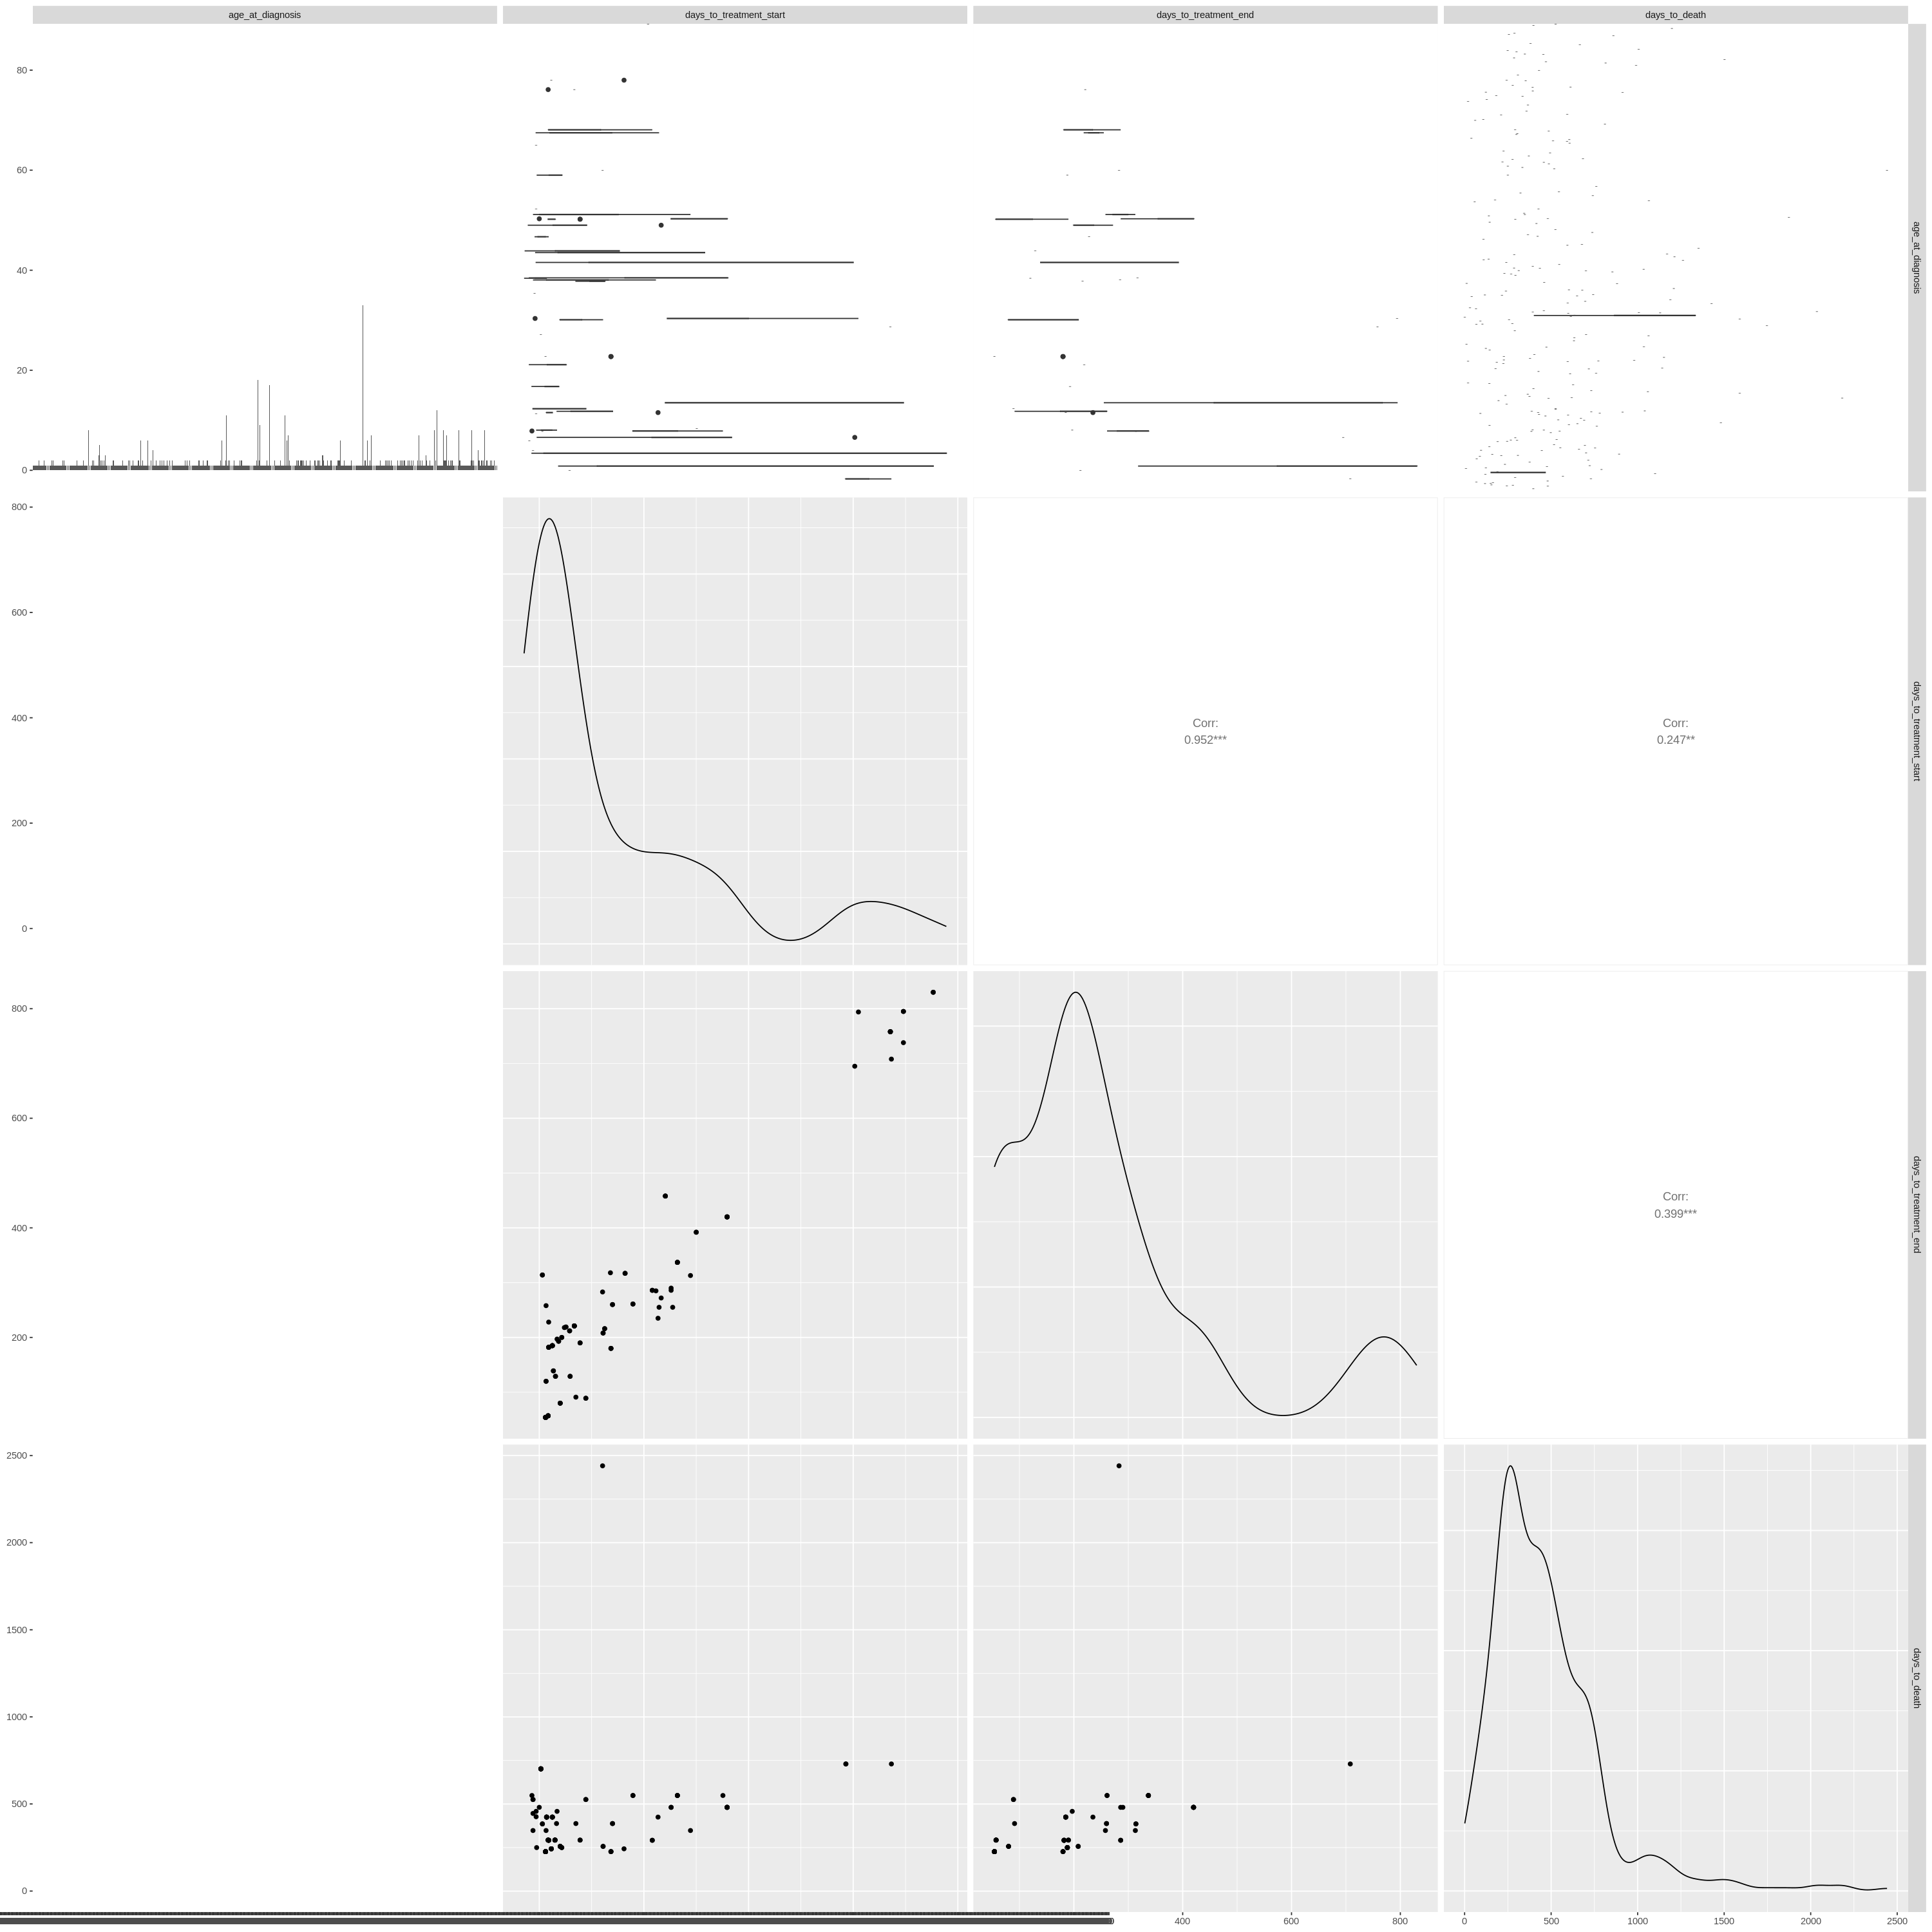

In [88]:
options(repr.plot.width = 25, repr.plot.height = 25)
ggpairs (data,
        columns = pair_cols, cardinality_threshold=NULL,
        mapping = aes(color = NULL),
        lower = list(combo = wrap("facethist", binwidth=0.8)))

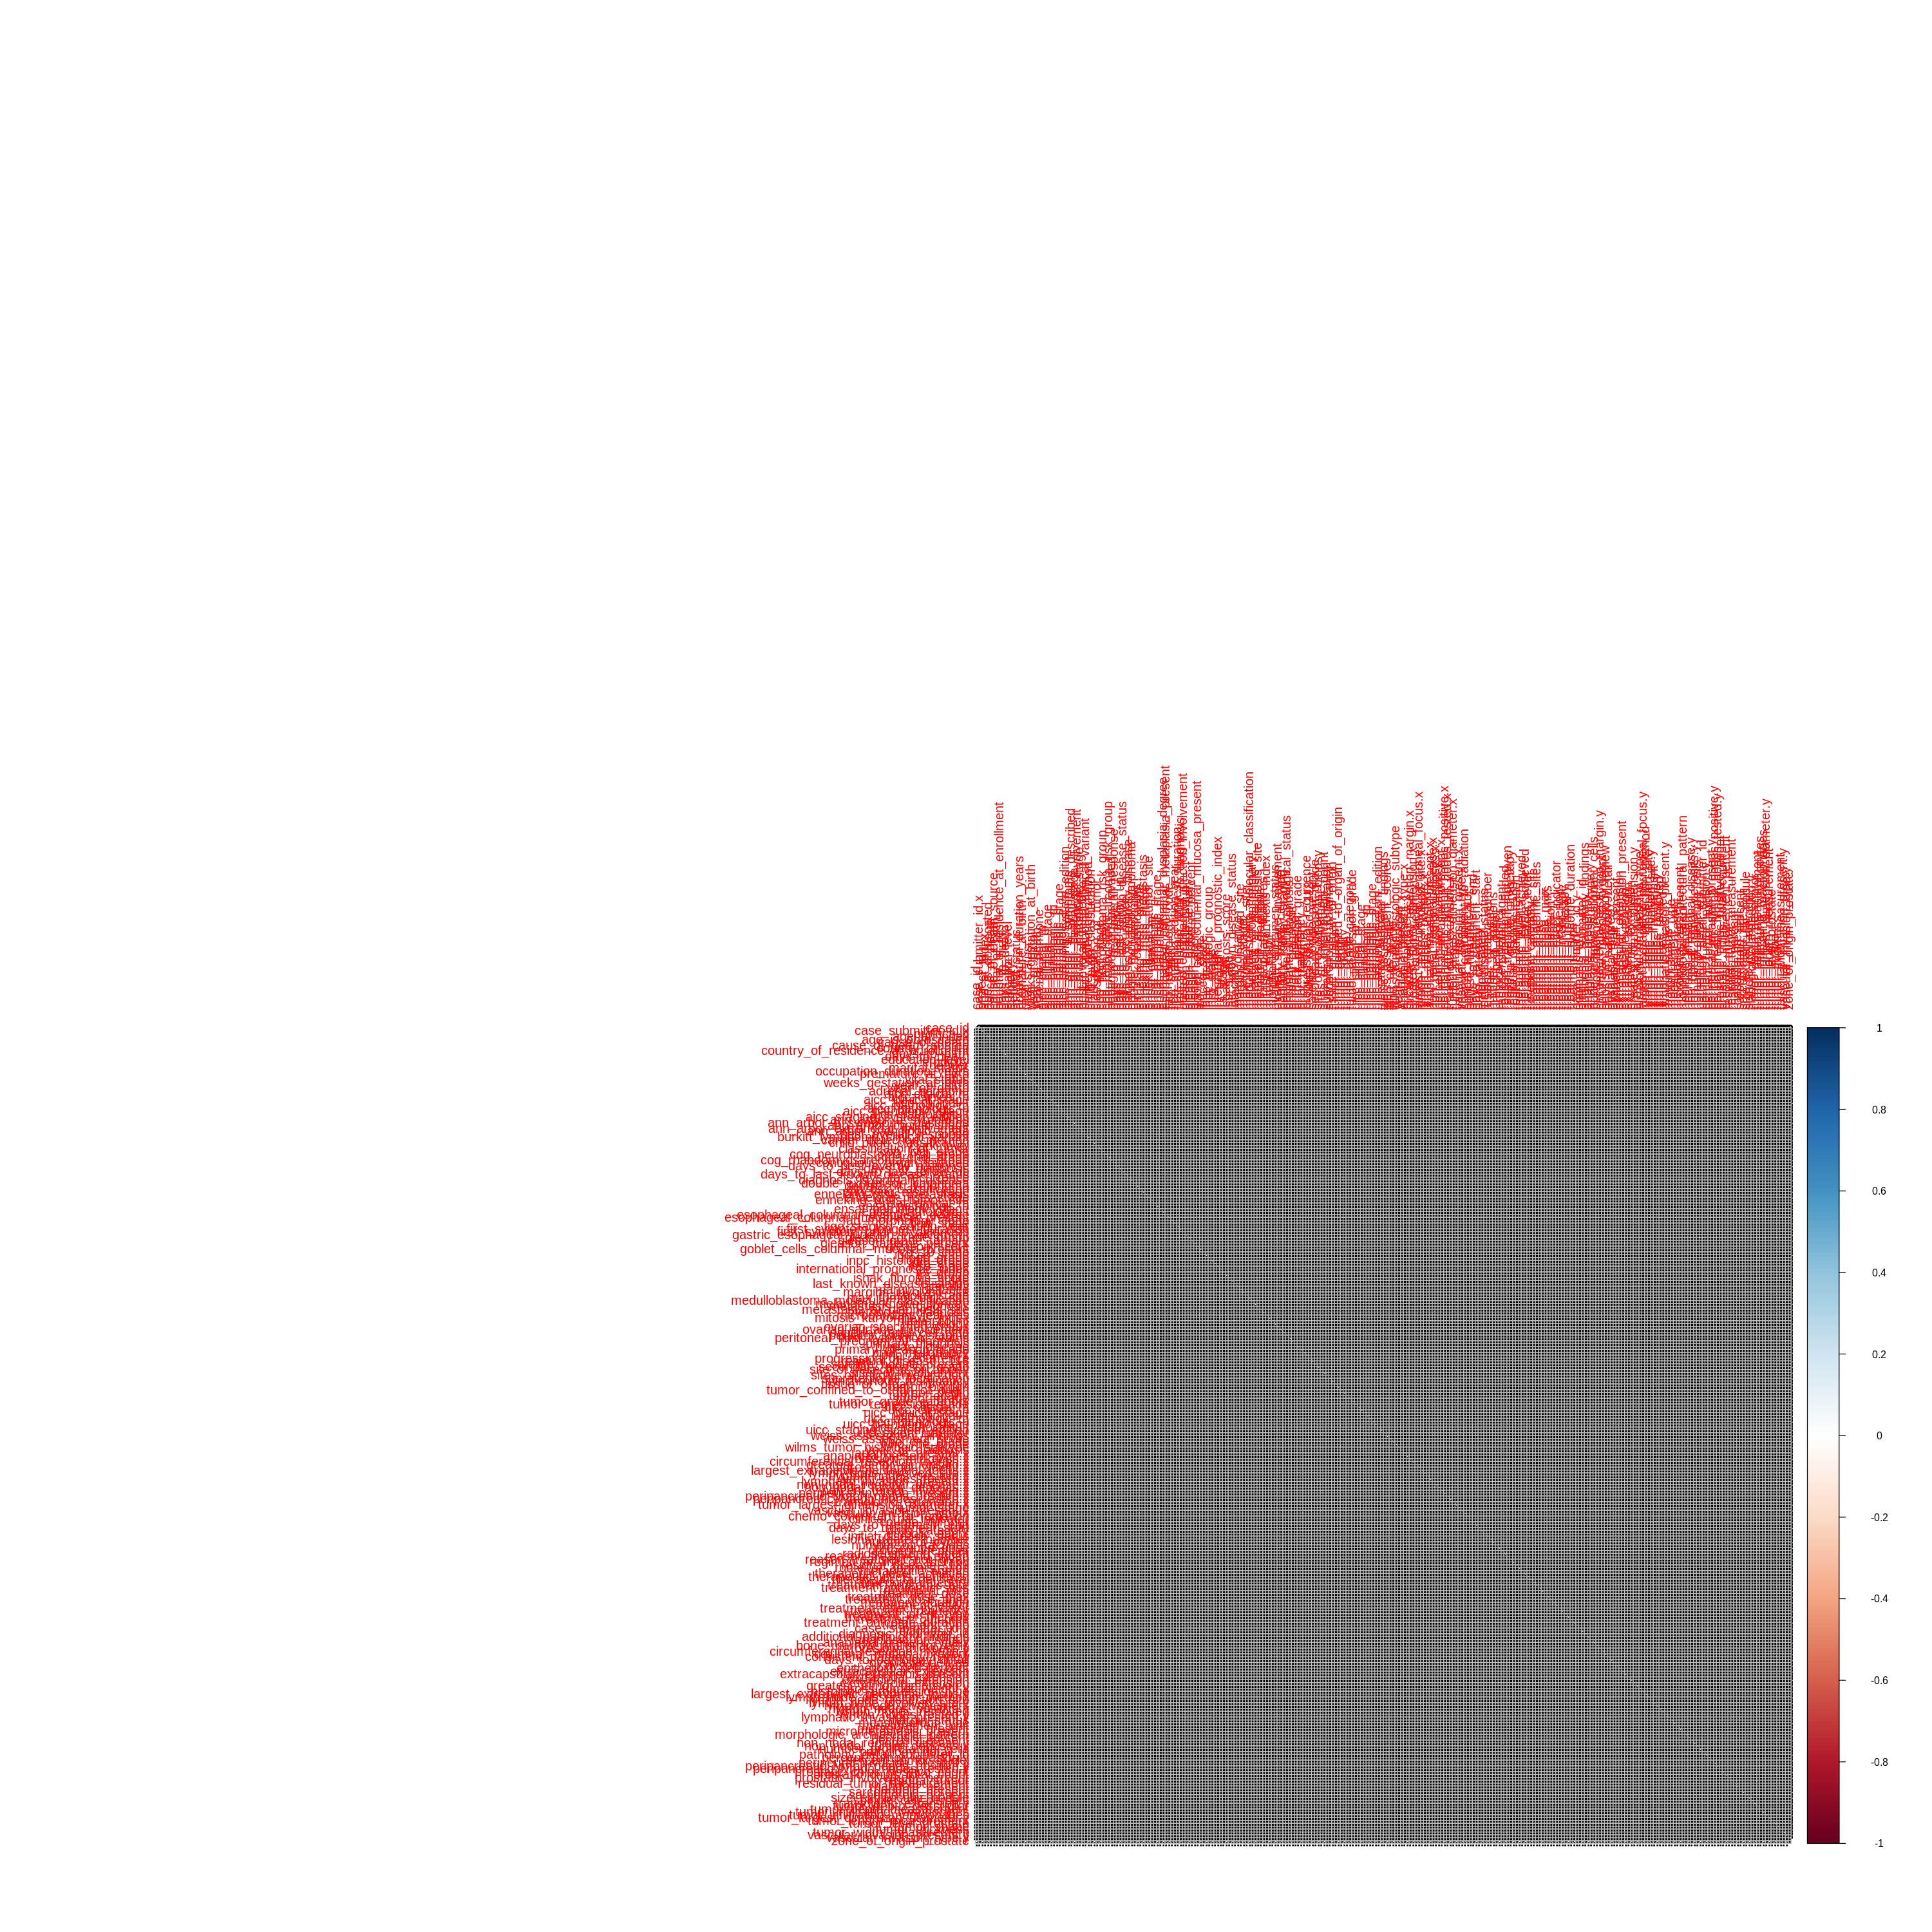

In [89]:
corrplot(cor(select_if(data, is.numeric)))

In [105]:
summary(data$age_at_diagnosis)

'--   25156   22116   22825   26698   23060   24655   19673   21139   26533   27321   22096   23371   24261   18041   22861   17648   24206   26629   27193   27551   28367   29271   30305   22238 
     85      33      18      18      18      17      15      12      12      12      12      11      11      11      10       9       8       8       8       8       8       8       8       8       7 
  23374   23410   25328   25941   26320   26701   27330   27727   29434   19813   20008   22008   22468   23399   23666   24642   25255   27308   28240   18129   27264   20210   21917   24299   24467 
      7       7       7       7       7       7       7       7       7       6       6       6       6       6       6       6       6       6       6       5       5       4       4       4       4 
  26727   29585   18059   18357   24117   24150   25246   26881   31319   13127   13907   14599   14729   15129   15188   15559   15708   15807   15869   16126   16255   16766   17294   17628   17649 
      4       4       3       3       3       3       3       3       3       2       2       2       2       2       2       2       2       2       2       2       2       2       2       2       2 
  17711   17794   17821   18103   18172   18202   18262   18315   18475   18607   18627   19064   19287   19315   19511   19677   19707   19718   19839   19847   19904   20051   20071   20133 (Other) 
      2       2       2       2       2       2       2       2       2       2       2       2       2       2       2       2       2       2       2       2       2       2       2       2    1154

In [140]:
data <- read_xlsx("/content/drive/MyDrive/Data_since_in_Healthcare/ASIM/HW_08/data.xlsx", sheet = 1) %>%
  rename_with(make.names)
data

case_id,case_submitter_id.x,project_id,age_at_index,age_is_obfuscated,cause_of_death,cause_of_death_source,country_of_birth,country_of_residence_at_enrollment,days_to_birth,⋯,tumor_infiltrating_macrophages,tumor_largest_dimension_diameter.y,tumor_length_measurement,tumor_level_prostate,tumor_shape,tumor_thickness,tumor_width_measurement,vascular_invasion_present.y,vascular_invasion_type.y,zone_of_origin_prostate
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
00061f34-c891-4f9c-b8d6-3ca68b98c875,AD1348,FM-AD,'--,'--,'--,'--,'--,'--,'--,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
0035b612-8955-4da5-a35d-bced5b32cbec,AD258,FM-AD,'--,'--,'--,'--,'--,'--,'--,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
008147fd-3235-4bab-b816-7589590959d1,AD10836,FM-AD,'--,'--,'--,'--,'--,'--,'--,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
00f67c2e-b77f-4082-907c-1dd4ea418f14,AD12672,FM-AD,'--,'--,'--,'--,'--,'--,'--,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
01462f16-c767-40ee-8c81-d3927d308aa8,AD8272,FM-AD,'--,'--,'--,'--,'--,'--,'--,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
014cd6ee-733c-4894-997e-cfb534a587c1,AD15735,FM-AD,'--,'--,'--,'--,'--,'--,'--,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
01775b06-5836-469c-8537-120cb8cc94e9,TCGA-IB-7897,TCGA-PAAD,53,'--,'--,'--,'--,'--,-19718,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
01775b06-5836-469c-8537-120cb8cc94e9,TCGA-IB-7897,TCGA-PAAD,53,'--,'--,'--,'--,'--,-19718,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
01793010-6599-4c35-91ae-534d03577343,AD7106,FM-AD,'--,'--,'--,'--,'--,'--,'--,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [156]:
data <- data %>% mutate_all (na_if,"'--")
data

case_id,case_submitter_id.x,project_id,age_at_index,age_is_obfuscated,cause_of_death,cause_of_death_source,country_of_birth,country_of_residence_at_enrollment,days_to_birth,⋯,tumor_infiltrating_macrophages,tumor_largest_dimension_diameter.y,tumor_length_measurement,tumor_level_prostate,tumor_shape,tumor_thickness,tumor_width_measurement,vascular_invasion_present.y,vascular_invasion_type.y,zone_of_origin_prostate
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
00061f34-c891-4f9c-b8d6-3ca68b98c875,AD1348,FM-AD,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
0035b612-8955-4da5-a35d-bced5b32cbec,AD258,FM-AD,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
008147fd-3235-4bab-b816-7589590959d1,AD10836,FM-AD,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
00f67c2e-b77f-4082-907c-1dd4ea418f14,AD12672,FM-AD,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
01462f16-c767-40ee-8c81-d3927d308aa8,AD8272,FM-AD,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
014cd6ee-733c-4894-997e-cfb534a587c1,AD15735,FM-AD,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
01775b06-5836-469c-8537-120cb8cc94e9,TCGA-IB-7897,TCGA-PAAD,53,NA,NA,NA,NA,NA,-19718,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
01775b06-5836-469c-8537-120cb8cc94e9,TCGA-IB-7897,TCGA-PAAD,53,NA,NA,NA,NA,NA,-19718,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
01793010-6599-4c35-91ae-534d03577343,AD7106,FM-AD,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [230]:
# delet all outdatas
new_df = subset(data, select = - c(1:10, 12:13, 15:18, 20:23, 25:205, 208:285))
new_df

days_to_death,gender,vital_status,age_at_diagnosis,treatment_intent_type,treatment_or_therapy
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
NA,female,Not Reported,23207,NA,NA
NA,male,Not Reported,23810,NA,NA
NA,female,Not Reported,23617,NA,NA
NA,female,Not Reported,19101,NA,NA
NA,female,Not Reported,18206,NA,NA
NA,female,Not Reported,22889,NA,NA
486,female,Dead,19718,NA,no
486,female,Dead,19718,NA,no
NA,male,Not Reported,13248,NA,NA


In [222]:
# удаление NA обнуляет весь датасет
# new_df <- na.omit(data)
# new_df

Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”


case_id,case_submitter_id.x,project_id,age_at_index,age_is_obfuscated,cause_of_death,cause_of_death_source,country_of_birth,country_of_residence_at_enrollment,days_to_birth,⋯,tumor_infiltrating_macrophages,tumor_largest_dimension_diameter.y,tumor_length_measurement,tumor_level_prostate,tumor_shape,tumor_thickness,tumor_width_measurement,vascular_invasion_present.y,vascular_invasion_type.y,zone_of_origin_prostate
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>


In [234]:
write_tsv(new_df,'/content/drive/MyDrive/Data_since_in_Healthcare/ASIM/HW_08/new_df.tsv')

In [236]:
work_df <- read_tsv('/content/drive/MyDrive/Data_since_in_Healthcare/ASIM/HW_08/new_df.tsv')
work_df

Rows: 1787 Columns: 6
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): gender, vital_status, treatment_intent_type, treatment_or_therapy
dbl (2): days_to_death, age_at_diagnosis

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


days_to_death,gender,vital_status,age_at_diagnosis,treatment_intent_type,treatment_or_therapy
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>
NA,female,Not Reported,23207,NA,NA
NA,male,Not Reported,23810,NA,NA
NA,female,Not Reported,23617,NA,NA
NA,female,Not Reported,19101,NA,NA
NA,female,Not Reported,18206,NA,NA
NA,female,Not Reported,22889,NA,NA
486,female,Dead,19718,NA,no
486,female,Dead,19718,NA,no
NA,male,Not Reported,13248,NA,NA


In [267]:
as.numeric(sub(work_df_df$age_at_diagnosis, fixed = TRUE))

ERROR: Error in sub(work_df_df$age_at_diagnosis, fixed = TRUE): argument "x" is missing, with no default


In [265]:
work_df_df$age_at_diagnosis <- as.numeric(work_df_df, fixed = TRUE)

ERROR: Error in eval(expr, envir, enclos): 'list' object cannot be coerced to type 'double'


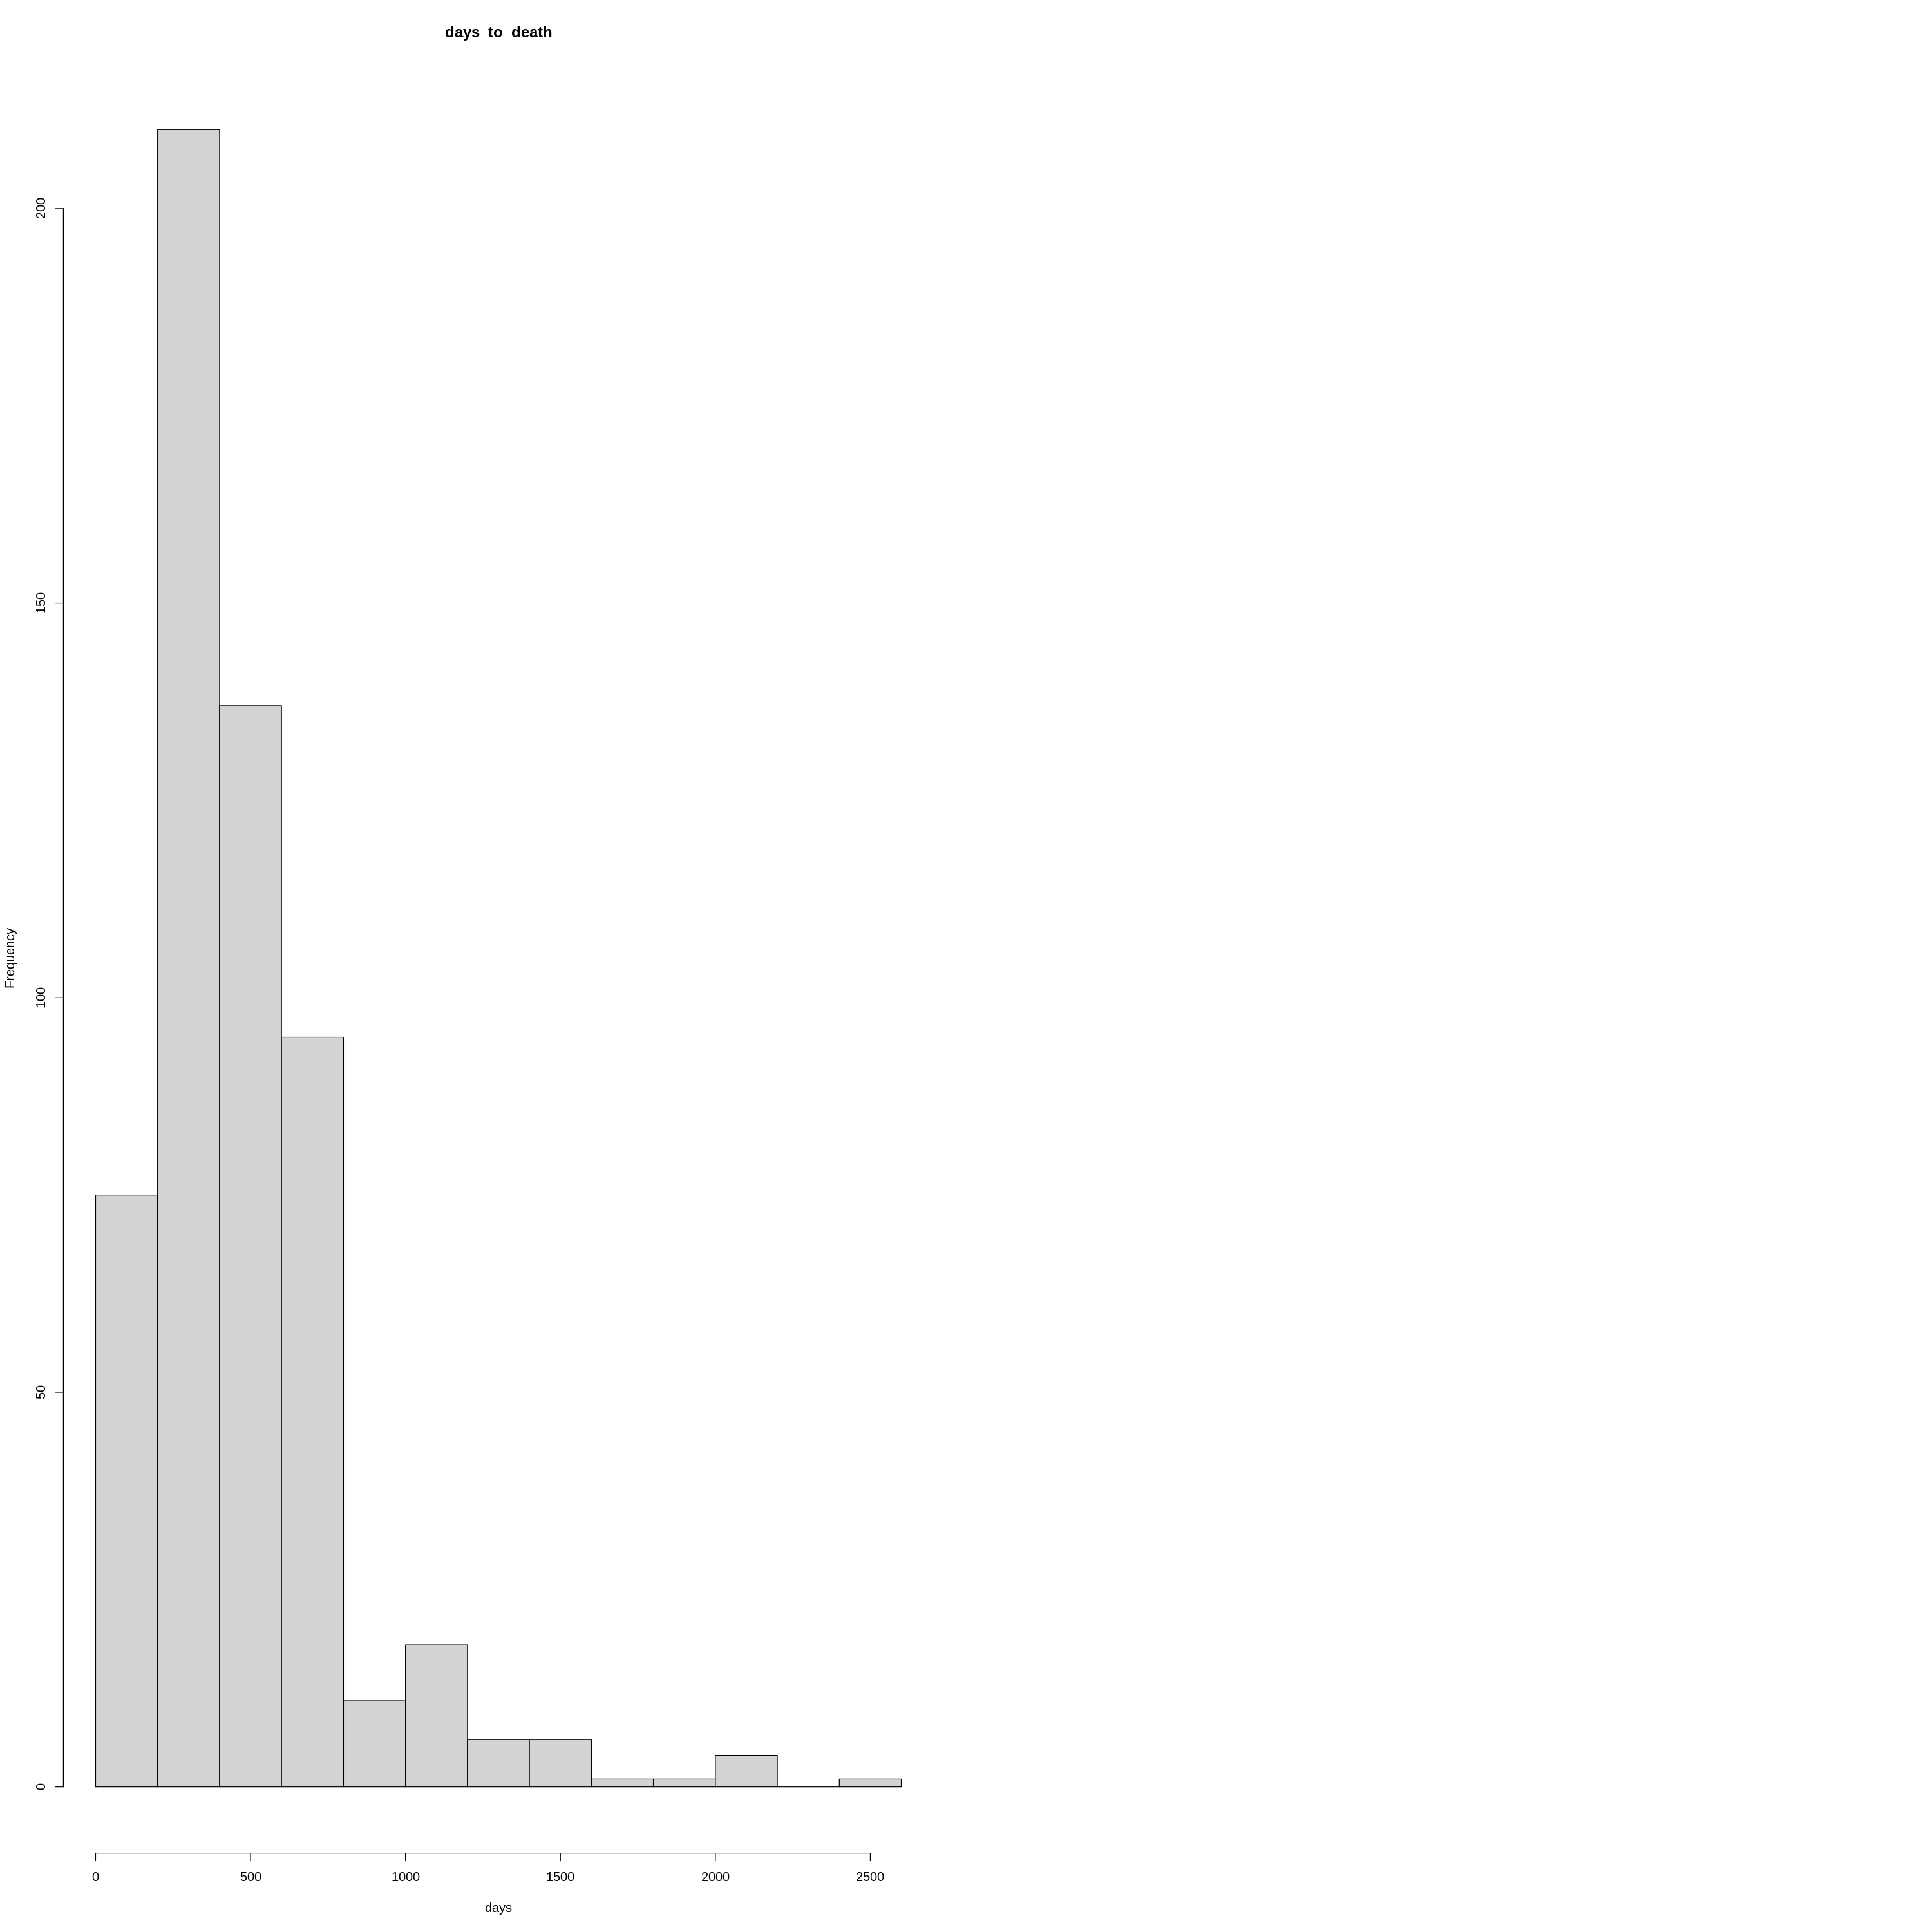

In [268]:
par(mfrow = c(1, 2)) # Расположение графиков
hist(work_df_df$days_to_death, main = 'days_to_death', xlab = "days")
# hist(work_df_df$age_at_diagnosis, main = 'age_at_diagnosis', xlab = "days") - не получается заменить на нумерик ((

ERROR: Error in plot.window(...): need finite 'xlim' values


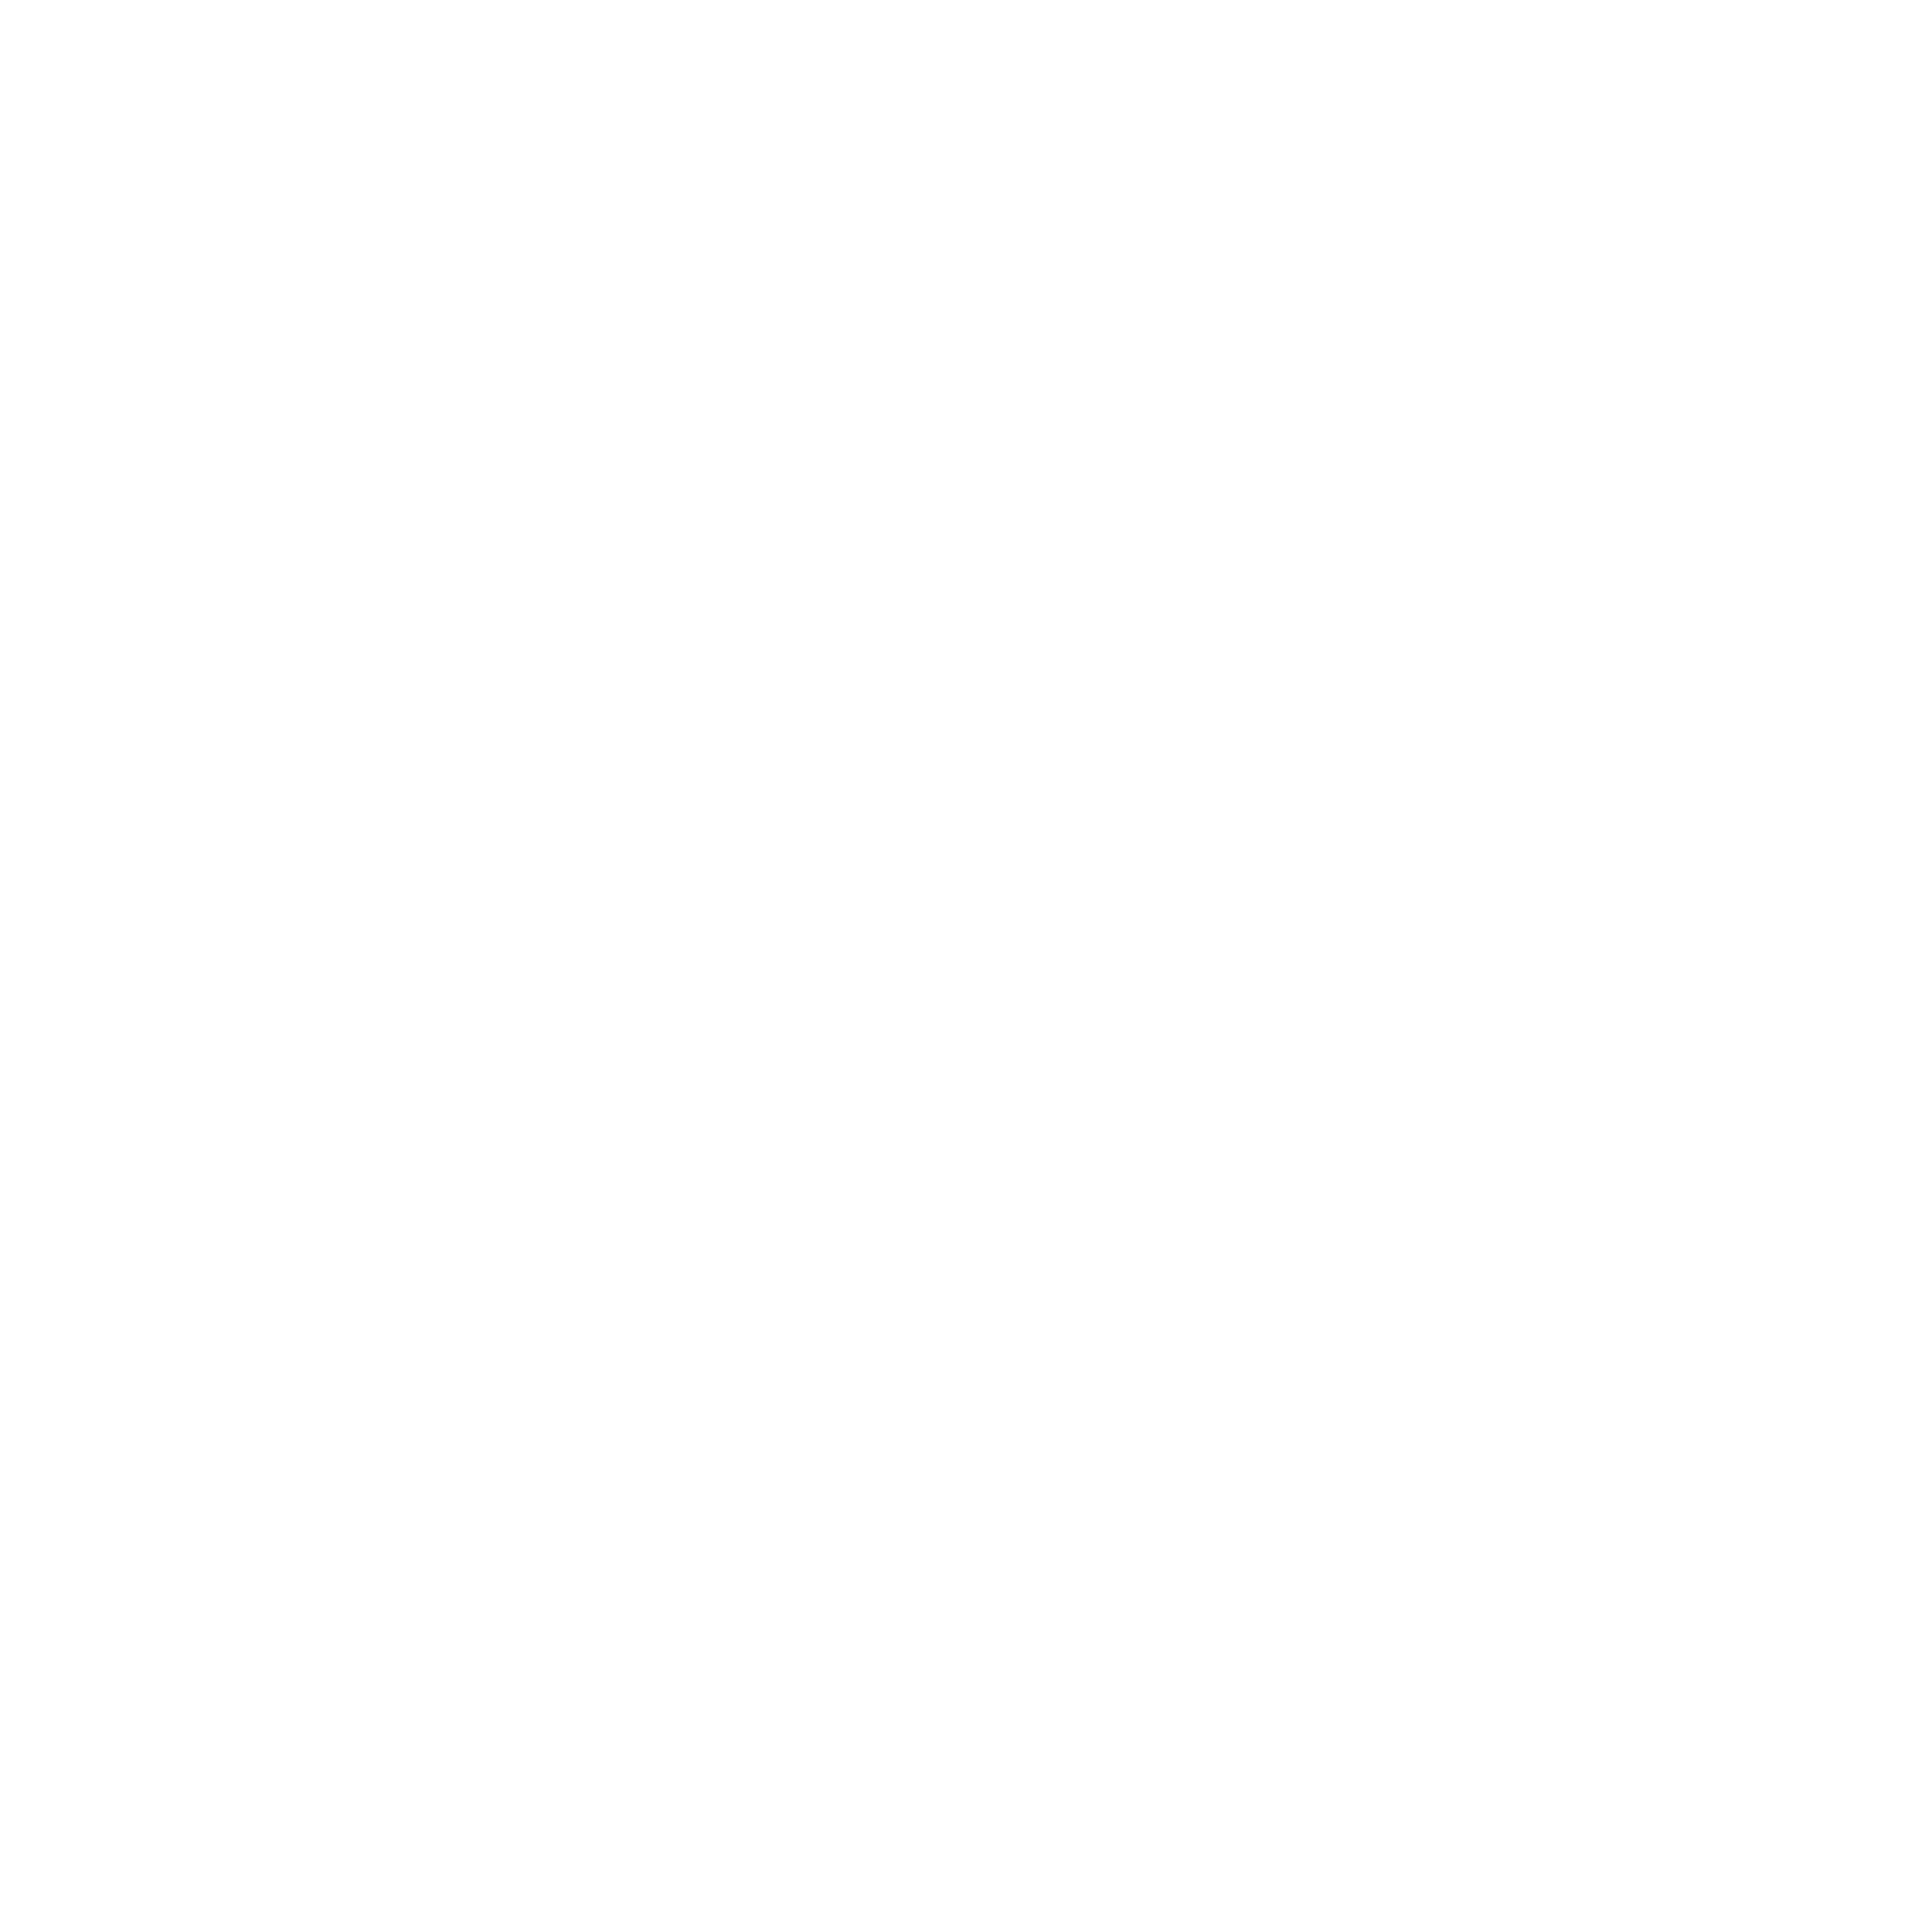

In [269]:
desc <- descdist(work_df_df$days_to_death, discrete = FALSE)

best_fit <- fitdist(work_df_df$days_to_death, "norm")
summary(best_fit)

Warning message:
“Unknown or uninitialised column: `Wt`.”


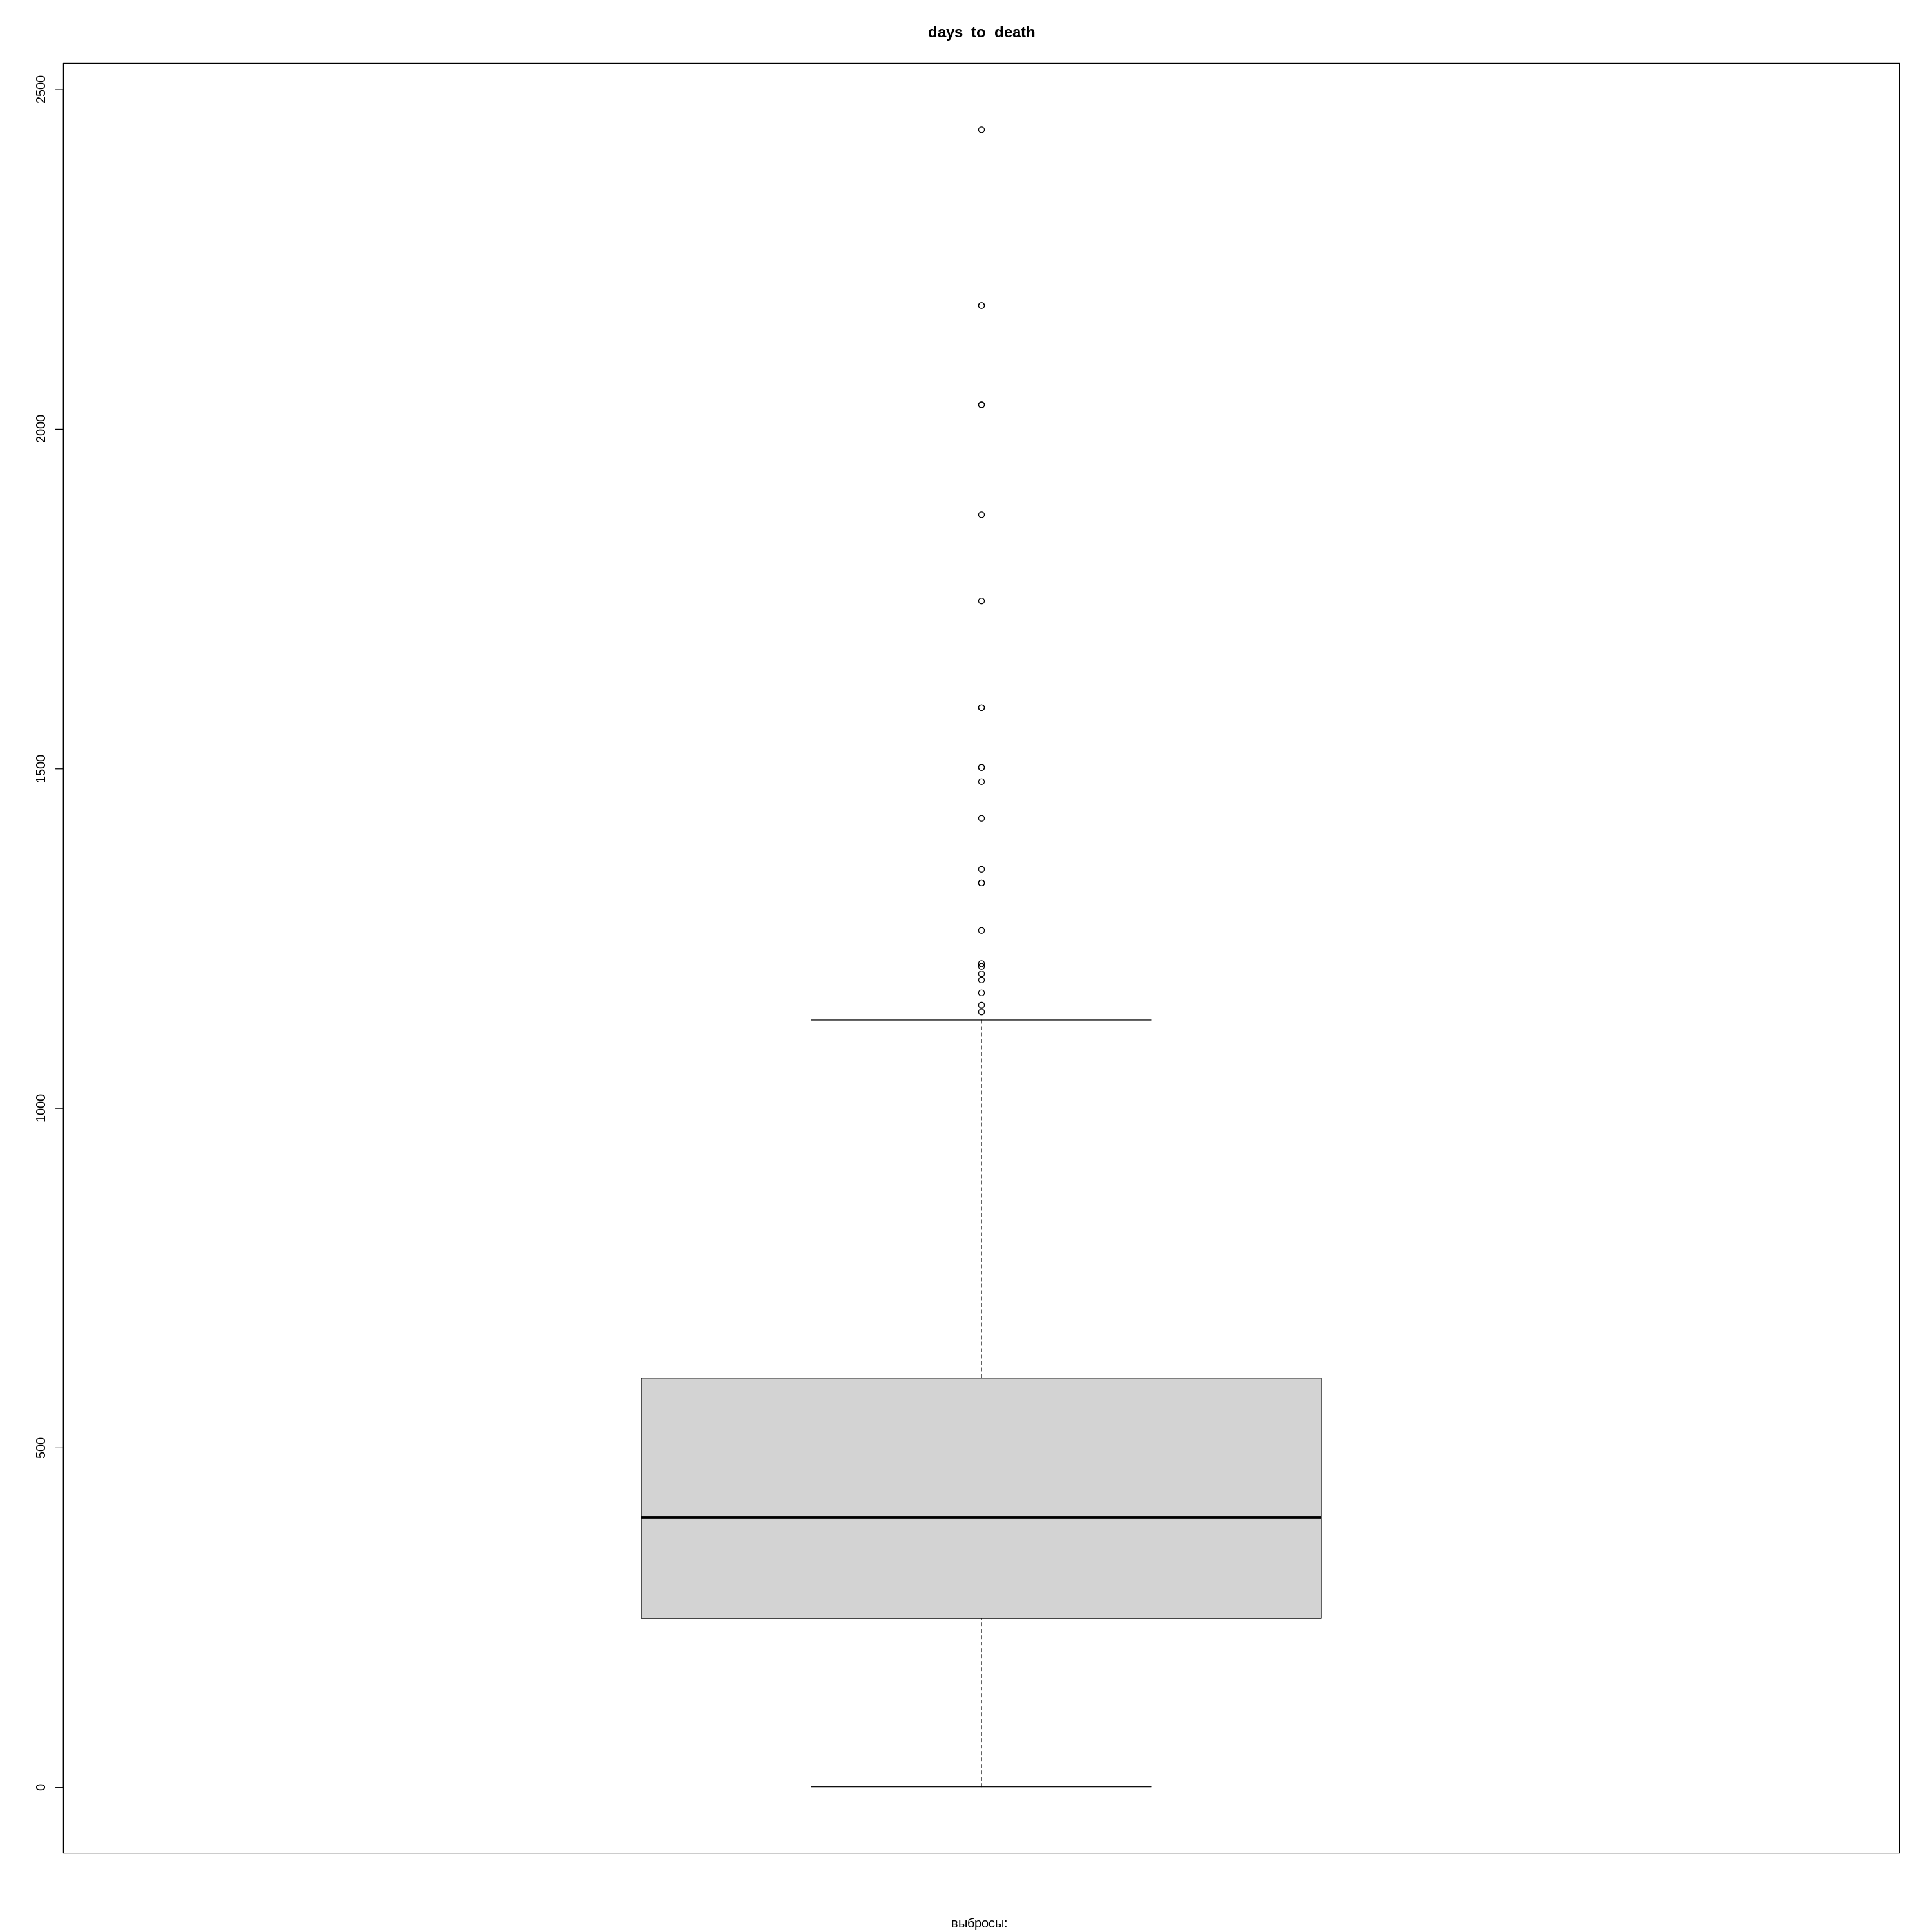

In [271]:
boxplot(work_df_df$days_to_death, main = "days_to_death",
        sub=paste("выбросы:", boxplot.stats(data$Wt)$out))

In [276]:
# recoding status to conventional
work_df_df  <-
  work_df_df %>%
  as_tibble() %>%
  mutate(vital_status = recode(status, `Not Reported` = 1, `Alive` = 1, `Unknown` = 1, `Dead` = 0))

ERROR: [1m[33mError[39m in `mutate()`:[22m
[1m[22m[36mℹ[39m In argument: `vital_status = recode(status, `Not Reported` = 1, Alive = 1, Unknown = 1, Dead = 0)`.
[1mCaused by error in `recode()`:[22m
[33m![39m unused arguments (`Not Reported` = 1, Alive = 1, Unknown = 1, Dead = 0)


In [279]:
work_df_df <- work_df_df %>% select("vital_status", "age_at_diagnosis")

ERROR: [1m[33mError[39m in `select()`:[22m
[33m![39m Can't select columns that don't exist.
[31m✖[39m Column `vital_status` doesn't exist.


In [280]:
work_df_df %>%
  tbl_summary(statistic = status ~ "{n} / {N}") %>%
  add_stat_label() %>%
  bold_labels()

ERROR: [1m[33mError[39m:[22m
[1m[22m[33m![39m Error in `statistic=` argument input. Select from ‘days_to_death’, ‘treatment_or_therapy’


P.S. Что на входе, то и на выходе... ((